<a href="https://colab.research.google.com/github/kb22/Tensorflow-Course/blob/master/Classifying_colored_images_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying colored images using CNN

In this notebook, I'll create a Convolutional Neural Network with Data augmentation and Dropout to train on a collection of images of cats and dogs. The complete deep learning methodology will be followed:

1. Importing libraries
2. Loading the dataset
3. Exploratory data analysis
4. Preparing the data
5. Creating the CNN model
6. Training the CNN model and analysis
7. Improving the CNN model using data augmentation and dropout
8. Training the improved CNN model and analysis


## Importing libraries

The first step is to import the libraries needed to process, train and test on the dataset.

In [0]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load the dataset

I will use the `get_file()` method from Keras to download the dataset using a URL. The dataset for cats and dogs is available at the URL https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip. As the dataset is a zip file, I'll extract it as well.

As a part of the `get_file()` method, I'll first define the `fname` which represents the name of the file, then the url as `origin` and `extract` as True to extract the zip file.

In [0]:
dataset_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin = dataset_url, extract = True)

I'll also define the directories for the training and validation data so that I can use them when reading the cats and dogs images.

In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

cats_train_dir = os.path.join(train_dir, 'cats')
dogs_train_dir = os.path.join(train_dir, 'dogs')
cats_validation_dir = os.path.join(validation_dir, 'cats')
dogs_validation_dir = os.path.join(validation_dir, 'dogs')

As the dataset is now available to me, I'll take a look at the data and see if I can draw any information out of them.

## Exploratory data analysis

I'll first begin by taking a look at the images of each class and their counts.

### Distribution of data

Let's first see how the data is distributed amongst the two classes and also among training and validation data.

In [4]:
print("Total Cat images in training data: {}".format(len(os.listdir(cats_train_dir))))
print("Total Dog images in training data: {}".format(len(os.listdir(dogs_train_dir))))
print("--")
print("Total Cat images in validation data: {}".format(len(os.listdir(cats_validation_dir))))
print("Total Dog images in validation data: {}".format(len(os.listdir(dogs_validation_dir))))

Total Cat images in training data: 1000
Total Dog images in training data: 1000
--
Total Cat images in validation data: 500
Total Dog images in validation data: 500


There are only 1000 images for either cats or dogs for training. This is a very small number for a neural network to understand all features and classify them apart more accurately.
However, for now, I'll iterate over the dataset multiple times (through epochs).

### Working with images

I'll also take a look at the images from each class and see how they appear.

Cats in training data


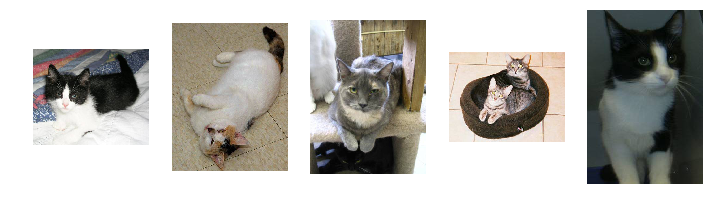

In [5]:
plt.figure(figsize = (12, 8))
for index, image in enumerate(os.listdir(cats_train_dir)[:5]):
  image = plt.imread(os.path.join(cats_train_dir, image))
  plt.subplot(1, 5, index+1)
  plt.axis('off')
  plt.imshow(image)
print("Cats in training data")

Dogs in training data


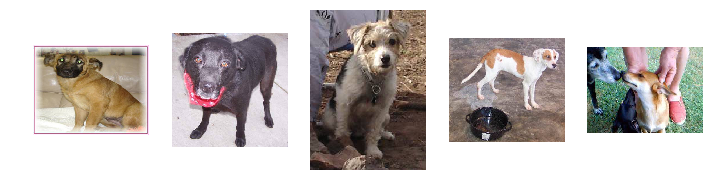

In [6]:
plt.figure(figsize = (12, 8))
for index, image in enumerate(os.listdir(dogs_train_dir)[:5]):
  image = plt.imread(os.path.join(dogs_train_dir, image))
  plt.subplot(1, 5, index+1)
  plt.axis('off')
  plt.imshow(image)
print("Dogs in training data")

From the images above, I can infer the following:
1. Each image is of different size. As a neural network can only work with images of same size, I'll have to resize each image to specific dimensions.
2. The cats/dogs in each image are not the same. They are of different colors, breed and more. The model must learn the correct differences between the two classes.

## Preparing the data

I'll set some constants for batch size and dimensions of each image. Then, I'll use the Keras **ImageDataGenerator** to scale the image and then the `flow_from_directory()` method to read the data from the directories.

In [0]:
BATCH_SIZE = 32
HEIGHT = 150
WIDTH = 150

In [8]:
train_data_generator = ImageDataGenerator(rescale = 1./255)
train_generator = train_data_generator.flow_from_directory(directory = train_dir, target_size = (HEIGHT, WIDTH), class_mode = 'binary', batch_size = BATCH_SIZE)

validation_data_generator = ImageDataGenerator(rescale = 1./255)
validation_generator = train_data_generator.flow_from_directory(directory = validation_dir, target_size = (HEIGHT, WIDTH), class_mode = 'binary', batch_size = BATCH_SIZE)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Create the CNN Model

The data is now ready to be used, I'll create a CNN model with 4 Convolutional layers each followed by a layer of MaxPooling. I'll flatten the output from it and feed it to a general neural network with two Dense layers, out of which the second one will be output layer.

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = tf.nn.relu, input_shape = (HEIGHT, WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units = 256, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 2, activation = tf.nn.softmax)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 18, 18, 256)      

The model that I've developed has 5, 697,602 different parameters that need to be set during training.

In [0]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Training the CNN Model

Now, I'll use the `fit_generator` method to train the model as I used the ImageDataGenerators. As I am working with a validation dataset, I'll also add it during training for the model to learn better. I'll set total epochs to be 50 such that the model will train on 50*2000 = 100,000 images.

In [26]:
class Logger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if (epoch%5 == 0 or epoch > 45):
          print("Epoch: {}".format(epoch+1))
          print("Training loss: {:.8f} | Training accuracy: {:.8f} | Validation Loss: {:.8f} | Validation accuracy: {:.8f}".format(logs['loss'], logs['acc'], logs['val_loss'], logs['val_acc']))
        
callback = Logger()
history = model.fit_generator(generator = train_generator, epochs = 50, validation_data = validation_generator, callbacks = [callback], verbose = 0)

Epoch: 0
Training loss: 0.70688346 | Training accuracy: 0.52200001 | Validation Loss: 0.69109526 | Validation accuracy: 0.50000000
Epoch: 5
Training loss: 0.57664855 | Training accuracy: 0.69250000 | Validation Loss: 0.59512709 | Validation accuracy: 0.69300002
Epoch: 10
Training loss: 0.38339169 | Training accuracy: 0.82349998 | Validation Loss: 0.56790484 | Validation accuracy: 0.74699998
Epoch: 15
Training loss: 0.11543960 | Training accuracy: 0.95950001 | Validation Loss: 1.03935694 | Validation accuracy: 0.72899997
Epoch: 20
Training loss: 0.00574512 | Training accuracy: 0.99949998 | Validation Loss: 1.36315737 | Validation accuracy: 0.75199997
Epoch: 25
Training loss: 0.00025233 | Training accuracy: 1.00000000 | Validation Loss: 1.72336917 | Validation accuracy: 0.77100003
Epoch: 30
Training loss: 0.00007207 | Training accuracy: 1.00000000 | Validation Loss: 2.01258428 | Validation accuracy: 0.76099998
Epoch: 35
Training loss: 0.00003693 | Training accuracy: 1.00000000 | Validati

The model trained and got a training accuracy of 100% right around epoch 25. However, the validation accuracy is approximately 76%. This huge difference is an indication that our model might have overfit on the training data. I'll analyse the loss and accuracy curves to know more.

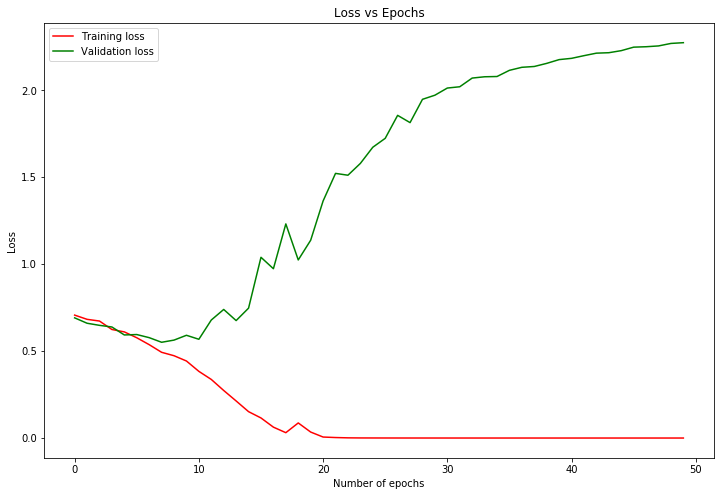

In [30]:
plt.figure(figsize = (12, 8))
plt.plot(range(50), history.history['loss'], color = 'red', label = 'Training loss')
plt.plot(range(50), history.history['val_loss'], color = 'green', label = 'Validation loss')
plt.title("Loss vs Epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()

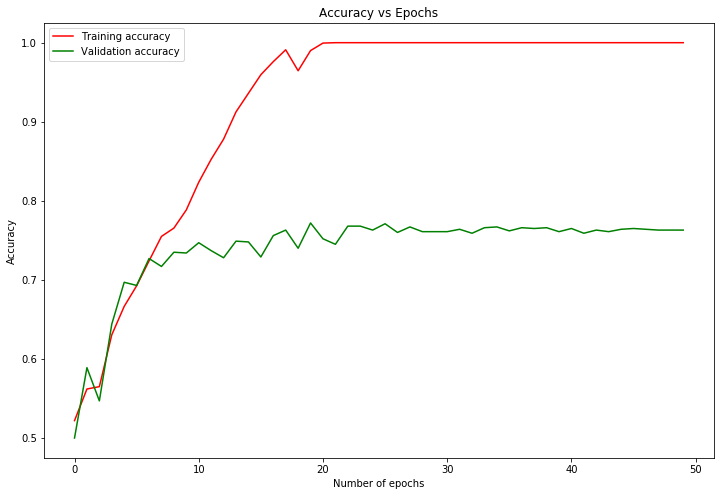

In [31]:
plt.figure(figsize = (12, 8))
plt.plot(range(50), history.history['acc'], color = 'red', label = 'Training accuracy')
plt.plot(range(50), history.history['val_acc'], color = 'green', label = 'Validation accuracy')
plt.title("Accuracy vs Epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()

From the two plots above, we can see that the deviation between training and validation data suddenly start increasing after around epoch 8. Thus, I'll now try to improve the model using certain techniques.